In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D

## Least-squares via row-reduction

In [ ]:
m = 10
n = 3

X = np.random.randn(m,n) # design matrix
y = np.random.randn(m,1) # output measures "data" # column vector banako as (m,1)

np.shape(y)


(10, 1)

In [ ]:
# Try directly applying RREF
Xy = Matrix(np.concatenate([X,y],axis=1))
print(Xy.rref()) #this didnot work

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]]), (0, 1, 2, 3))


In [ ]:
# Now, reapply the normal equation
normal_eq = Matrix(np.concatenate([X.T@X,X.T@y],axis=1))
print("X_sol: ",np.array(normal_eq.rref()[0]))
print("beta: ",np.array(normal_eq.rref()[0][:,-1]))


X_sol:  [[1 0 0 -0.278441840896575]
 [0 1 0 0.425618988223826]
 [0 0 1 -0.303800313422893]]
beta:  [[-0.278441840896575]
 [0.425618988223826]
 [-0.303800313422893]]


In [ ]:
# Compare to left inverse
beta2 = np.linalg.inv(X.T@X) @ (X.T@y)
print(beta2)

[[-0.27844184]
 [ 0.42561899]
 [-0.30380031]]


In [ ]:
# compare with python solver
beta3 = np.linalg.solve(X.T@X , X.T@y) # practical use
print(beta3)

[[-0.27844184]
 [ 0.42561899]
 [-0.30380031]]


### Ls- example 1

In [ ]:
# data
data = np.array([[-4,0,-3,1,2,8,5,8]]).T
N = len(data)

# Design matrix
X = np.ones([N,1])

# Fit the model
b = np.linalg.solve(X.T@X, X.T@data)

# compare against mean
m = np.mean(data)

# print the results
print(b,m)

[[2.125]] 2.125


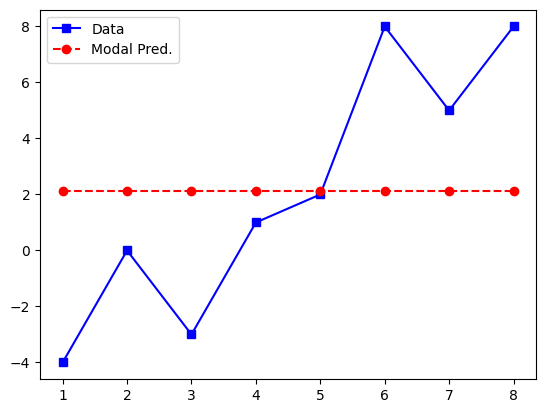

In [ ]:
# Compute model predicted values
yHat = X@b

# plot
plt.plot(np.arange(1,N+1), data, 'bs-', label='Data')
plt.plot(np.arange(1,N+1), yHat, 'ro--', label='Modal Pred.')

plt.legend()
plt.show()

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]


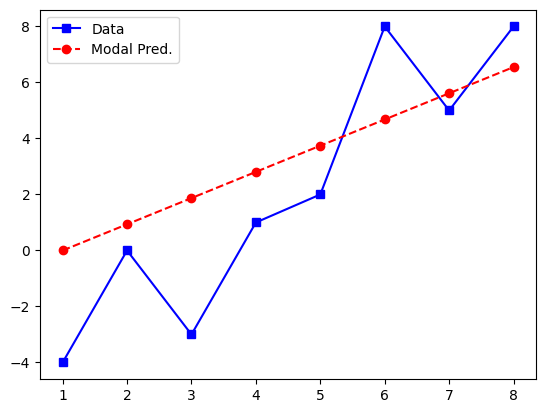

In [ ]:
# Lets change the design matrix
X = np.array([np.arange(0,N)]).T
print(X)

# fit
b = np.linalg.solve(X.T@X, X.T@data)

# compute model predected values
yHat = X@b

# plot
plt.plot(np.arange(1,N+1), data, 'bs-', label='Data')
plt.plot(np.arange(1,N+1), yHat, 'ro--', label='Modal Pred.')

plt.legend()
plt.show()

# conclusion: Still this design matrix is not that accurate!

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]]


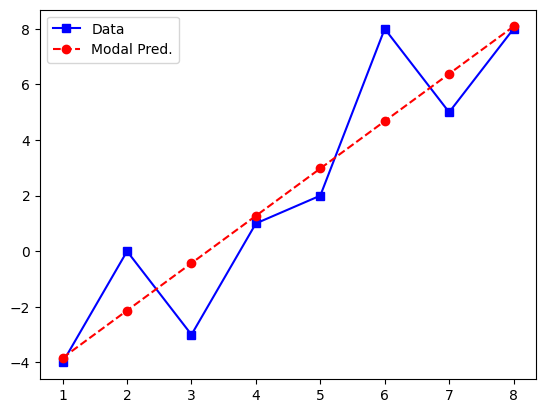

In [ ]:
# design matrix with intercept

X = np.concatenate([np.ones([N,1]), np.array([np.arange(0,N)]).T],axis=1)
print(X)

#fit
b = np.linalg.solve(X.T@X, X.T@data)

# predicted value
yHat = X @ b

# plot
plt.plot(np.arange(1,N+1), data, 'bs-', label='Data')
plt.plot(np.arange(1,N+1), yHat, 'ro--', label='Modal Pred.')

plt.legend()
plt.show()

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  4.]
 [ 1.  9.]
 [ 1. 16.]
 [ 1. 25.]
 [ 1. 36.]
 [ 1. 49.]]


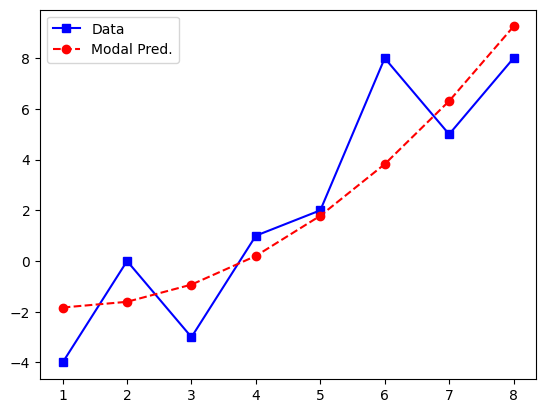

In [ ]:
# Now with non linearity in design matrix

# design matrix
X = np.concatenate([np.ones([N,1]), np.array([np.arange(0,N)**2]).T], axis=1)
print(X)

# fit
b = np.linalg.solve(X.T@X, X.T@data)

# predicted value
yHat = X@b

# plot
plt.plot(np.arange(1,N+1), data, 'bs-', label='Data')
plt.plot(np.arange(1,N+1), yHat, 'ro--', label='Modal Pred.')

plt.legend()
plt.show()

### Ls- example 2

dict_keys(['__header__', '__version__', '__globals__', 'EEGdata', 'frex', 'rts'])


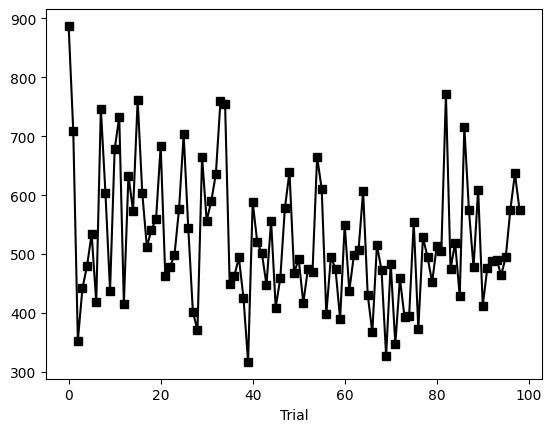

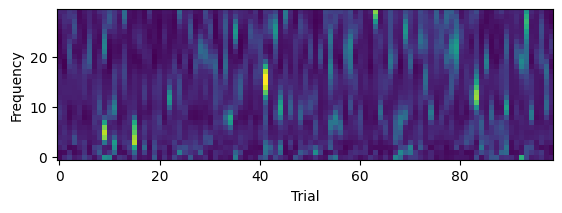

In [ ]:
# Load data 
data = sio.loadmat('EEG_RT_data.mat')
#print(data)
print(data.keys())

rts = data['rts']
rts = rts[0]
EEGdata = data['EEGdata']
frex = data['frex']
frex = frex[0]

nTrials = len(rts)
nFrex = len(frex)

#show data
plt.plot(rts,'ks-')
plt.xlabel('Trial')
plt.show()

plt.imshow(EEGdata, origin='lower')
plt.xlabel('Trial')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# lets see whether brain signal(EEG) is correlated with reaction time(rts)

# create and fit model for one frequency

X = np.concatenate([np.ones([nTrials-1,1]),
                    np.reshape(rts[0:-1],(nTrials-1,1)),
                    np.reshape(EEGdata[10,:-1],(nTrials-1,1))],# column vector banako with reshape
                   axis =1)
print(X)

b1 = np.linalg.solve(X.T@X, X.T@rts[1:])
b2 = np.linalg.lstsq(X,rts[1:],rcond=None)[0] # ls method
print(b1)
print(b2)


[[ 1.00000000e+00  8.87207031e+02  7.06178066e-02]
 [ 1.00000000e+00  7.09472656e+02 -3.00217141e-01]
 [ 1.00000000e+00  3.53027344e+02 -8.52999696e-01]
 [ 1.00000000e+00  4.41894531e+02 -6.50497968e-01]
 [ 1.00000000e+00  4.79980469e+02 -3.24369788e-01]
 [ 1.00000000e+00  5.34179688e+02 -7.81709747e-01]
 [ 1.00000000e+00  4.17968750e+02 -6.22904229e-01]
 [ 1.00000000e+00  7.46582031e+02 -2.61516927e-01]
 [ 1.00000000e+00  6.03515625e+02  1.09224504e+00]
 [ 1.00000000e+00  4.37988281e+02 -5.55976814e-01]
 [ 1.00000000e+00  6.77734375e+02  7.92290072e-01]
 [ 1.00000000e+00  7.32910156e+02  2.70894106e+00]
 [ 1.00000000e+00  4.16015625e+02 -7.70186615e-01]
 [ 1.00000000e+00  6.33300781e+02 -6.55889811e-01]
 [ 1.00000000e+00  5.73242188e+02 -2.79227682e-01]
 [ 1.00000000e+00  7.62207031e+02 -2.21701981e-01]
 [ 1.00000000e+00  6.04003906e+02 -7.25787292e-01]
 [ 1.00000000e+00  5.12207031e+02 -4.44398662e-01]
 [ 1.00000000e+00  5.41503906e+02 -8.24896965e-01]
 [ 1.00000000e+00  5.59570312e+

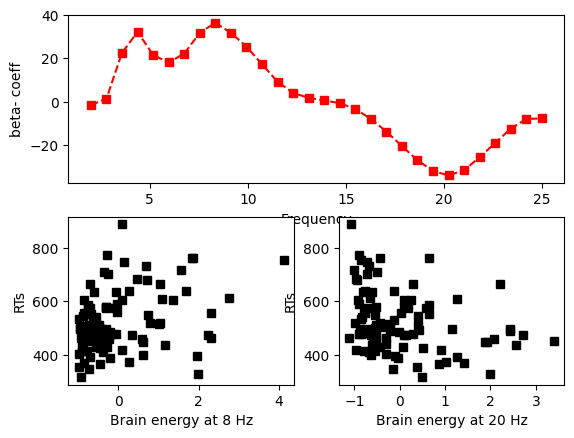

In [ ]:
# initialize beta coeff vector
b = np.zeros(len(frex))

# loop over frequencies
for fi in np.arange(0,len(frex)):
  #design matrix 
  X = np.concatenate([np.ones([nTrials,1]),
                      np.reshape(EEGdata[fi,:],(nTrials,1))],
                     axis=1)

  #compute parameters
  t = np.linalg.lstsq(X,rts,rcond=None)[0]
  b[fi] = t[1]


plt.subplot(211)
plt.plot(frex,b,'rs--')
plt.xlabel('Frequency')
plt.ylabel('beta- coeff')

plt.subplot(223)
plt.plot(EEGdata[8,:],rts,'ks')
plt.ylabel('RTs')
plt.xlabel('Brain energy at ' + str(int(frex[8])) + ' Hz')

plt.subplot(224)
plt.plot(EEGdata[23,:],rts,'ks')
plt.ylabel('RTs')
plt.xlabel('Brain energy at ' + str(int(frex[23])) + ' Hz')
plt.show()



```
conclusion: 8 hz ma positive correlation xa
           20 hz ma negative correlation xa
```



### code challenge: ls via QR decomp

In [ ]:
X = np.random.randn(10,3)
y = np.random.randn(10,1)

Q,R = np.linalg.qr(X)

b1 = np.linalg.solve(R.T@R, (Q@R).T @ y)

b2 = np.linalg.solve(X.T@X, X.T@y)

b3 = np.linalg.lstsq(X,y,rcond=None)[0]
print(b1)
print(b2)
print(b3)




[[ 0.44048986]
 [ 0.25215278]
 [-0.19754992]]
[[ 0.44048986]
 [ 0.25215278]
 [-0.19754992]]
[[ 0.44048986]
 [ 0.25215278]
 [-0.19754992]]
